In [107]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
sell=pd.read_csv("Data/sell.csv")

# Mission 2

In [109]:
sell.head()
CAP=sell

In [110]:
sell.head()

,Unnamed: 0,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,45
1,1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,2000,22
2,2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,1979,43
3,3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,1963,59
4,4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,1980,42


In [111]:
sell=sell[['id_prod','date','session_id','client_id','price','categ','sex','birth','age']]

In [112]:
sell.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,2000,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,1979,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,1963,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,1980,42


In [113]:
sell1=sell.copy()

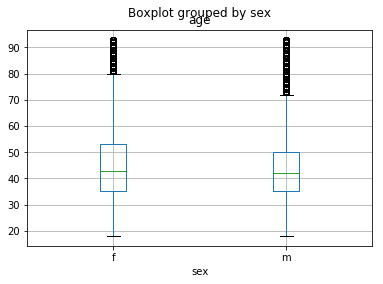

In [114]:
sell.boxplot(column='age',by='sex')

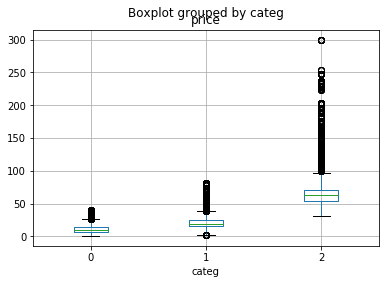

In [115]:
sell.boxplot(column='price',by='categ')

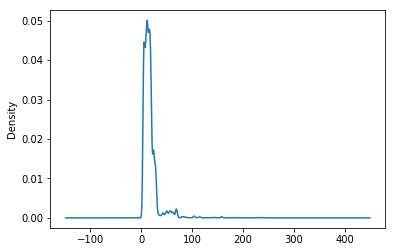

In [116]:
sell['price'].plot.kde()

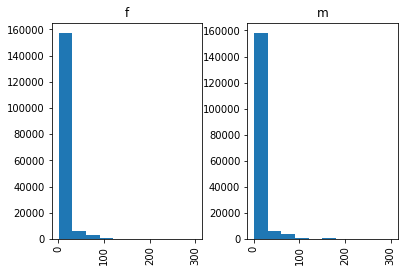

In [117]:
sell.hist(column='price',by='sex')
plt.show()

In [118]:
client=sell.groupby(['client_id']).sum()

In [119]:
client=client.sort_values(by='price',ascending=False)
#Ici on affiche nos clients par leur dépense total dans l'order décroissant afin de détecter des  éventuelles anomalies

In [120]:
client.head(n=15)

,price,categ,birth,age
client_id,,,,
c_1609,162007.340000,2570,25452900,539910
c_4958,144257.210000,4208,5121438,58926
c_6714,73218.633656,1971,8802864,241542
c_3454,54464.213656,1953,6448475,173575
c_7959,2564.250000,38,384930,9360
c_8026,2548.316828,40,381754,8492
c_4491,2540.530000,53,333312,6384
c_2140,2527.010000,43,385515,8775
c_8392,2515.980000,41,373842,8316


In [121]:
client['Pourcent_CA']=(client['price']/client['price'].sum())*100

In [122]:
client['Pourcent_CA'].head()
#Ici on voit que le top4 possèdes ressources trop importante et donc il faut les écarter

client_id
c_1609    2.794350
c_4958    2.488191
c_6714    1.262897
c_3454    0.939415
c_7959    0.044229
Name: Pourcent_CA, dtype: float64

In [123]:
top4_client=['c_1609',"c_4958","c_6714","c_3454"]

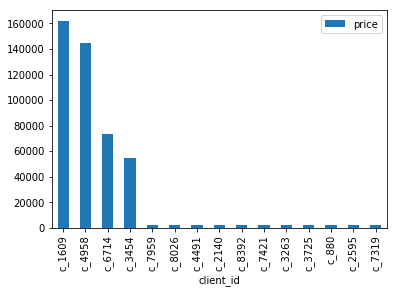

In [124]:
client.reset_index(inplace=True)
client.head(n=15).plot.bar(x='client_id', y='price')

In [125]:
sell=sell.loc[~sell['client_id'].isin(top4_client),:]
#Ici nous retirons notre top4

In [126]:
Top_15_client=client.head(n=15).index.values #je stockes les identifants des 15 meilleurs acheteurs

In [127]:
Top_15_client

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

--------------------
0
moy:
 10.645050678519459
med:
 9.99
var:
 24.27421592822165
std:
 4.926887042364748
skw:
 0.42541669361939843
kur:
 -0.3777536453237804


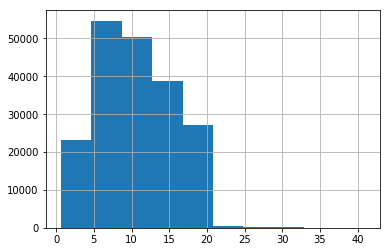

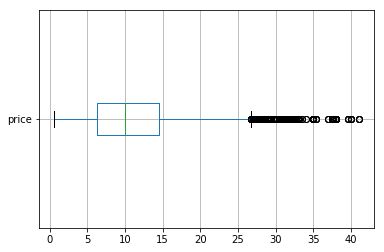

--------------------
2
moy:
 75.11313848692225
med:
 62.54
var:
 1531.8809728803296
std:
 39.13925105160202
skw:
 2.3130531091776154
kur:
 5.475923138731206


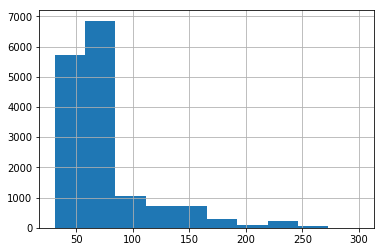

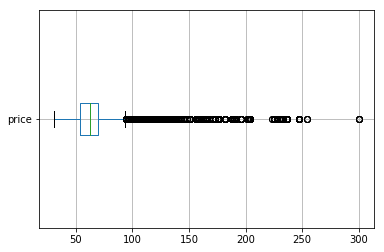

--------------------
1
moy:
 20.478298075515564
med:
 19.08
var:
 57.33375331295103
std:
 7.571905527207206
skw:
 1.7168805164809864
kur:
 8.047109728034242


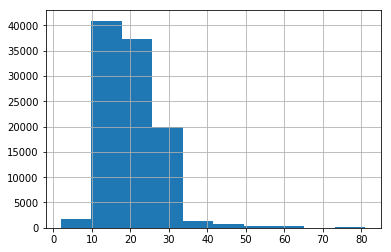

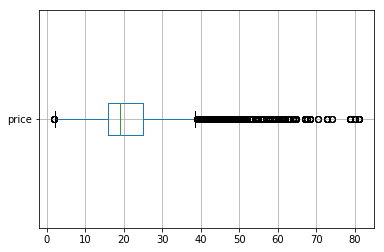

In [128]:
for cat in sell["categ"].unique():
    sous_echantillon = sell[sell.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",sous_echantillon['price'].mean())
    print("med:\n",sous_echantillon['price'].median())
    print("var:\n",sous_echantillon['price'].var(ddof=0))
    print("std:\n",sous_echantillon['price'].std(ddof=0))#Standard deviation 
    print("skw:\n",sous_echantillon['price'].skew())
    print("kur:\n",sous_echantillon['price'].kurtosis())
    #fig=sous_echantillon["price"].hist()
    #fig=fig.get_figure()
    #fig.savefig('sous_echantillon_prix.png')
    sous_echantillon["price"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme
    #fig1=sous_echantillon.boxplot(column="price", vert=False)
    #fig1=fig1.get_figure()
    #fig1.savefig('sous_echantillon_prix.png')
    sous_echantillon.boxplot(column="price", vert=False)
    plt.show()

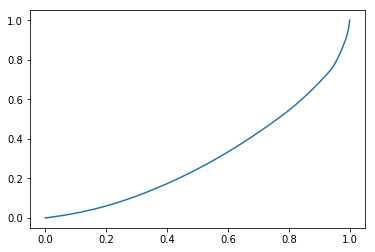

In [129]:
import numpy as np

depenses = sell[sell['price'] > 0]
dep = sell['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
#fig=fig.get_figure()
plt.show()




In [130]:
#Ici on peut voir que 5%-10% des clients font 25% du CA, puisque notre courbe remonte de manière anormale
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
# aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.38923770566914073

In [131]:
sell['mois'] = pd.to_datetime(sell['date']).dt.to_period('M')
#Ici on crée  une colonne mois pour travailler de manière plus efficace

In [132]:
sell.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,mois
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,45,2021-04
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,2000,22,2022-02
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,1979,43,2021-09
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,1963,59,2021-10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,1980,42,2021-07


In [133]:
time_serie=sell.groupby(by='mois').sum()
#On réalise un groupby par moi en faisant pour mieux visualiser les prix

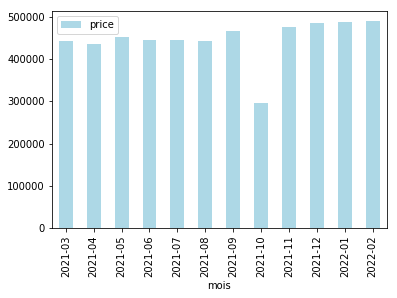

In [134]:
fig=time_serie.plot.bar(y='price',color='lightblue')
fig=fig.get_figure()
fig.savefig('date.png')
#Ici on s'apercoit que nos ventes ont baissé en octobre 2021

In [135]:
sell.date=pd.to_datetime(sell.date)

In [136]:
print(sell.loc[(sell['date']>=pd.to_datetime('2021-10-01',format='%Y-%m-%d')) 
               &(sell['date']<=pd.to_datetime('2021-10-31',format='%Y-%m-%d')),:])

       id_prod                       date session_id client_id  price  categ  \
3       0_2186 2021-10-17 03:27:18.783634   s_105936    c_4597   4.20      0   
10       0_423 2021-10-09 23:50:33.907269   s_102501    c_2225   1.99      0   
12      0_1368 2021-10-02 10:50:43.188179    s_98886     c_857   5.13      0   
14      0_1207 2021-10-12 23:22:51.290635   s_103927     c_648  16.99      0   
17      0_1452 2021-10-15 10:07:12.401758   s_105078    c_6297  13.77      0   
28      0_1572 2021-10-18 10:44:56.742021   s_106579    c_8589   8.61      0   
31      0_1127 2021-10-02 10:41:36.135881    s_98883    c_2041   5.99      0   
55      0_1034 2021-10-11 04:23:29.599571   s_103080    c_4870  14.38      0   
142     0_1420 2021-10-17 19:28:49.619771   s_106247     c_390  11.53      0   
160     0_1348 2021-10-17 13:29:31.536194   s_106138    c_1656  12.03      0   
163      2_227 2021-10-22 17:41:17.347164   s_108583    c_5841  50.99      2   
175     0_1435 2021-10-13 05:50:12.70026

In [137]:
sell.describe()

,price,categ,birth,age
count,313651.000000,313651.000000,313651.000000,313651.000000
mean,17.100940,0.427663,1977.793433,44.206567
std,17.594441,0.587569,13.797003,13.797003
min,0.620000,0.000000,1929.000000,18.000000
25%,8.580000,0.000000,1971.000000,35.000000
50%,13.820000,0.000000,1979.000000,43.000000
75%,18.990000,1.000000,1987.000000,51.000000
max,300.000000,2.000000,2004.000000,93.000000


In [138]:
Analyse=(sell.loc[(sell['date']>=pd.to_datetime('2021-10-01',format='%Y-%m-%d')) 
               &(sell['date']<=pd.to_datetime('2021-10-31',format='%Y-%m-%d')),:])
#On stocke notre mois suspect dans Analyse

In [139]:
Analyse_Nov=(sell.loc[(sell['date']>=pd.to_datetime('2021-11-01',format='%Y-%m-%d')) 
               &(sell['date']<=pd.to_datetime('2021-11-30',format='%Y-%m-%d')),:])
#On stocke un mois lambda pour comparer avec le mois d'octobre qui était suspect 

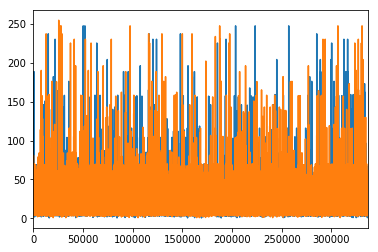

In [140]:
Analyse['price'].plot()
Analyse_Nov['price'].plot()
#Ici notre graphique n'est pas vraiment parlant 

In [141]:
print(Analyse["categ"].value_counts())
print(Analyse_Nov['categ'].value_counts())
#Ici nous trouvons notre explication le mois d'octobre a vendu bcp plus de categorie 0 et 10 fois moins de categorie
#D'ou la baisse de prix

0    16879
1     1243
2     1021
Name: categ, dtype: int64
0    13160
1    11027
2     1189
Name: categ, dtype: int64


On en déduit donc qu'il y a eu beaucoup plus de vente de catégorie 0 que d'habitude, en faisant baisser les ventes de categ 1 (divisé par 10)

# Q1 : Corrélation entre le sexe des clients et les catégories de produits achetés

In [142]:
X = "sex"
Y = "categ"

c = sell[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = sell[X].value_counts()
ty = sell[Y].value_counts()

#cont.loc[:,"Total"] = tx.values
#cont.loc["total",:] = ty
#cont.loc["total","Total"] = len(sell)
cont

categ,0,1,2
sex,,,
f,101206,53774,8122
m,94064,48851,7634


10.11086551372657


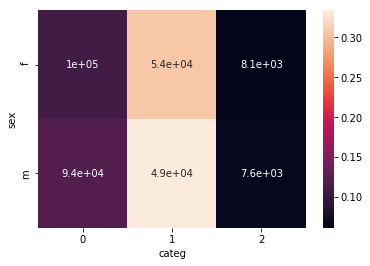

In [143]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(sell)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()#indicateur de corrélation 
print(xi_n)#
sns.heatmap(mesure/xi_n,annot=c)
plt.show()
#fig=sns.heatmap(mesure/xi_n,annot=c)
#fig=fig.get_figure()
#fig.savefig('heatmap.png')

# Q2.A : Corrélation entre l'âge des clients et le montant total des achats¶


 # Avec Outliers

In [144]:
categorie_age=sell.groupby('age').sum().reset_index()

In [145]:
categorie_age.head()

,age,price,categ,birth
0,18,295387.980000,8601,14725392
1,19,88461.390000,2571,4370546
2,20,89920.666828,2622,4452448
3,21,84881.480000,2410,4066032
4,22,80110.566828,2385,4350000


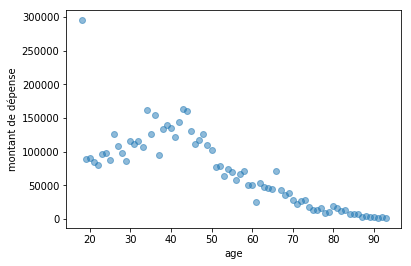

In [146]:
plt.plot(categorie_age["age"],categorie_age["price"],'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant de dépense")
#fig=fig.get_figure()
#fig.savefig('outlier_Q2A.png')
plt.show()
#fig=sns.heatmap(mesure/xi_n,annot=c)
#fig=fig.get_figure()
#fig.savefig('heatmap.png')


In [147]:
st.pearsonr(categorie_age["age"],categorie_age["price"])[0]

-0.8277056992132452

In [148]:
np.cov(categorie_age["age"],categorie_age["price"],ddof=0)[1,0]

-996419.9366378289

In [149]:
import statsmodels.api as sm

Y = categorie_age['price']
X = categorie_age[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

result.params

age           -2070.482985
intercept    185487.160890
dtype: float64

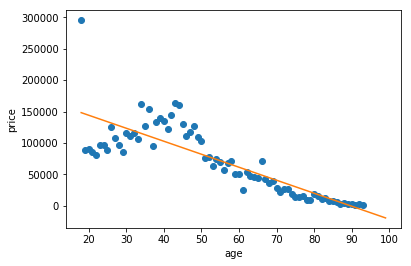

In [150]:
plt.plot(categorie_age.age,categorie_age.price, "o")
plt.plot(np.arange(18,100),[a*x+b for x in np.arange(18,100)])#18 represente le depart, un pas de 100 
plt.xlabel("age")
plt.ylabel("price")
plt.show()

 # Sans Outliers

In [151]:
CAP=sell1

In [152]:
CAP.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,2000,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,1979,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,1963,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,1980,42


In [153]:
CAP=CAP.loc[(CAP['age']!=18),:]

In [154]:
CAP.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,2000,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,1979,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,1963,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,1980,42


In [155]:
CAP=CAP.groupby('age').sum().reset_index()

In [156]:
CAP=CAP.loc[(CAP['price']<230000),:]

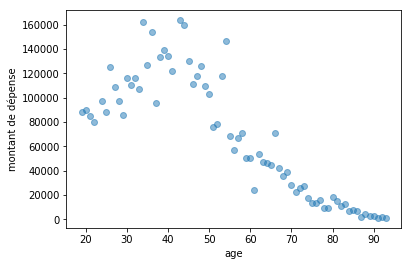

In [157]:
plt.plot(CAP["age"],CAP["price"],'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant de dépense")
plt.show()

In [158]:
st.pearsonr(CAP["age"],CAP["price"])[0]

-0.8397240934214883

In [159]:
np.cov(CAP["age"],CAP["price"],ddof=0)[1,0]

-897033.5520814197

In [160]:
#import statsmodels.api as sm

Y = CAP['price']
X = CAP[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.

In [161]:
import statsmodels.api as sm

Y = CAP['price']
X = CAP[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

result.params

age           -1935.390957
intercept    177510.733662
dtype: float64

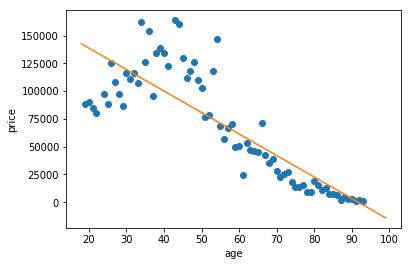

In [162]:
plt.plot(CAP.age,CAP.price, "o")
plt.plot(np.arange(18,100),[a*x+b for x in np.arange(18,100)])#18 represente le depart, un pas de 100 
plt.xlabel("age")
plt.ylabel("price")
plt.show()

# Q2.B : Corrélation entre l'âge des clients et la fréquence d’achat¶


# Avec Anomalies 

In [163]:
frequence=sell.groupby(['client_id','age']).nunique()[['id_prod','session_id']].reset_index()
frequence['price']=sell['price']
frequence.head()

,client_id,age,id_prod,session_id,price
0,c_1,67,19,15,4.99
1,c_10,66,27,16,65.75
2,c_100,30,6,3,10.71
3,c_1000,56,52,42,4.20
4,c_1001,40,56,24,8.99


In [164]:
frequence['frequence']=frequence['session_id']/12
frequence.head()

,client_id,age,id_prod,session_id,price,frequence
0,c_1,67,19,15,4.99,1.250000
1,c_10,66,27,16,65.75,1.333333
2,c_100,30,6,3,10.71,0.250000
3,c_1000,56,52,42,4.20,3.500000
4,c_1001,40,56,24,8.99,2.000000


In [165]:
FP=frequence.copy()

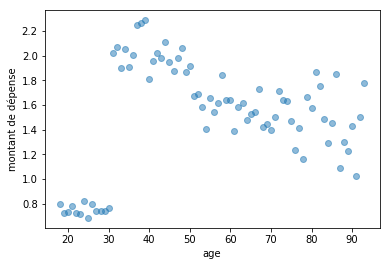

In [166]:
freq_final=frequence.groupby('age').mean().reset_index()
#depenses = sell[sell.price < 0]
plt.plot(freq_final["age"],freq_final["frequence"],'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant de dépense")
plt.show()

In [167]:
st.pearsonr(freq_final["age"],-freq_final["frequence"])[0]

-0.1777418375412899

In [168]:
np.cov(freq_final["age"],-freq_final["frequence"],ddof=0)[1,0]

-1.7074427264974765

# Sans anomalies 

In [169]:
FP.head()

,client_id,age,id_prod,session_id,price,frequence
0,c_1,67,19,15,4.99,1.250000
1,c_10,66,27,16,65.75,1.333333
2,c_100,30,6,3,10.71,0.250000
3,c_1000,56,52,42,4.20,3.500000
4,c_1001,40,56,24,8.99,2.000000


In [170]:
FP=(FP.loc[(FP['age']>30),:])

In [171]:
FP.head()

,client_id,age,id_prod,session_id,price,frequence
0,c_1,67,19,15,4.99,1.250000
1,c_10,66,27,16,65.75,1.333333
3,c_1000,56,52,42,4.20,3.500000
4,c_1001,40,56,24,8.99,2.000000
5,c_1002,40,24,11,3.99,0.916667


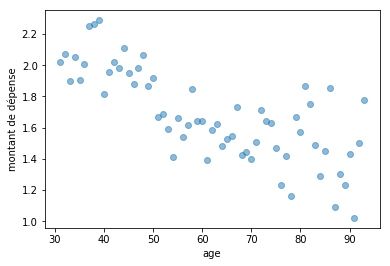

In [172]:
FP_final=FP.groupby('age').mean().reset_index()
#depenses = sell[sell.price < 0]
plt.plot(FP_final["age"],FP_final["frequence"],'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant de dépense")
plt.show()

In [173]:
st.pearsonr(FP_final["age"],FP_final["frequence"])[0] #Modif FP

-0.7547300344331659

In [174]:
np.cov(FP_final["age"],FP_final["frequence"],ddof=0)[1,0] #Modif FP

-3.9708512397973843

# Q2.C : Corrélation entre l'âge des clients et taille du panier moyen (en nombre d’articles)

# Avec Outliers 

In [175]:
frequence.head()

,client_id,age,id_prod,session_id,price,frequence
0,c_1,67,19,15,4.99,1.250000
1,c_10,66,27,16,65.75,1.333333
2,c_100,30,6,3,10.71,0.250000
3,c_1000,56,52,42,4.20,3.500000
4,c_1001,40,56,24,8.99,2.000000


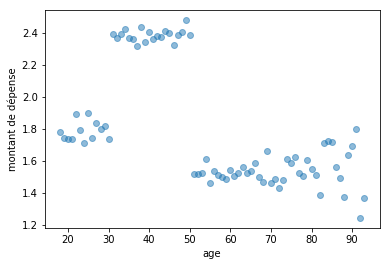

In [176]:
frequence['panier']=frequence['id_prod']/frequence['session_id']
panier_moy=frequence.groupby('age').mean().reset_index()
plt.plot(panier_moy["age"],panier_moy["panier"],'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant de dépense")
plt.show()

In [177]:
st.pearsonr(panier_moy["age"],-panier_moy["panier"])[0]

0.5679984987687602

In [178]:
np.cov(panier_moy["age"],-panier_moy["panier"],ddof=0)[1,0]

4.596687328645739

# Sans Outliers

In [179]:
FP1=frequence.copy()

In [180]:
FP1=(FP1.loc[(FP1['age']>50),:])

In [181]:
FP1.head()

,client_id,age,id_prod,session_id,price,frequence,panier
0,c_1,67,19,15,4.99,1.250000,1.266667
1,c_10,66,27,16,65.75,1.333333,1.687500
3,c_1000,56,52,42,4.20,3.500000,1.238095
8,c_1005,81,31,15,14.99,1.250000,2.066667
10,c_1007,81,15,11,1.99,0.916667,1.363636


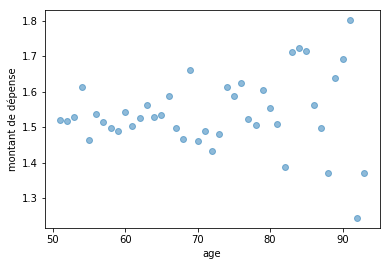

In [182]:
FP1['panier']=FP1['id_prod']/FP1['session_id']
panier_moy=FP1.groupby('age').mean().reset_index()
plt.plot(panier_moy["age"],panier_moy["panier"],'o',alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant de dépense")
plt.show()

In [183]:
st.pearsonr(panier_moy["age"],-panier_moy["panier"])[0]

-0.10163271654265892

In [184]:
np.cov(panier_moy["age"],-panier_moy["panier"],ddof=0)[1,0]

-0.12969008575635363

# Q2.D : Corrélation entre l'âge des clients et les catégories de produits achetés

In [185]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = sell.copy()

In [186]:
# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

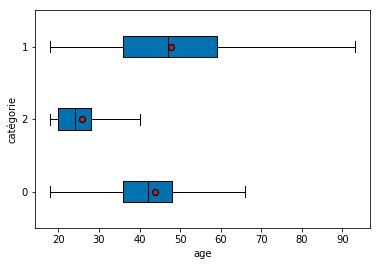

In [187]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("age")
plt.ylabel("catégorie")
plt.show()

In [188]:
#ANOVA
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11279029932310022